In [158]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [159]:
input_file = "/home/denisa/Documents/SI/lab10/training03Results.csv"
test_file = "/home/denisa/Documents/SI/lab10/testCuPuncteResults.csv"


# comma delimited is the default
data = pd.read_csv(input_file, header = 0)
data_test = pd.read_csv(test_file, header = 0)

In [160]:
data

predAbr ora data numar predPresc  web nume urmEOL sfarsitDeProp
0        no  no   no    no        no   no   no     no            no
1        no  no   no    no        no   no   no     no           yes
2        no  no   no    no        no   no   no     no           yes
3        no  no   no    no       yes   no   no     no            no
4        no  no   no    no        no   no   no     no            no
5        no  no   no    no        no   no   no     no           yes
6        no  no   no    no        no   no   no     no           yes
7        no  no   no    no        no   no   no     no            no
8        no  no   no    no        no   no   no     no           yes
9        no  no   no    no        no   no   no     no            no
10       no  no   no    no        no   no   no     no           yes
11       no  no   no    no        no   no   no     no           yes
12       no  no   no    no        no   no   no     no            no
13       no  no   no    no        no   no   no     no           yes
14       no  no   no    no        no   no   no     no            no
15       no  no   no    no        no   no   no     no           yes
16       no  no   no    no       yes   no   no     no            no
17       no  no   no    no       yes   no   no     no            no
18       no  no   no    no       yes   no   no     no            no
19       no  no   no    no        no   no   no     no           yes
20       no  no   no    no        no   no   no    yes           yes
21       no  no   no    no        no   no   no    yes           yes
22       no  no   no   yes        no   no   no     no            no
23       no  no   no    no        no   no   no     no           yes
24       no  no   no    no        no   no   no     no           yes
25       no  no   no    no        no   no   no     no           yes
26       no  no   no    no        no   no   no     no           yes
27       no  no   no    no        no   no   no     no           yes
28       no  no   no    no        no   no   no     no           yes
29       no  no   no    no        no   no   no     no           yes
..      ...  ..  ...   ...       ...  ...  ...    ...           ...
969      no  no   no    no        no   no   no    yes           yes
970      no  no   no    no        no   no   no     no            no
971      no  no   no   yes        no   no   no     no            no
972      no  no   no   yes        no   no   no     no            no
973      no  no   no   yes        no   no   no     no            no
974      no  no   no    no        no  yes   no     no            no
975      no  no   no    no        no  yes   no     no            no
976      no  no   no    no        no   no   no     no           yes
977      no  no   no    no        no   no   no     no           yes
978      no  no  yes    no        no   no   no     no            no
979      no  no  yes    no        no   no   no     no            no
980      no  no  yes    no        no   no   no     no            no
981      no  no  yes    no        no   no   no     no            no
982      no  no  yes    no        no   no   no     no            no
983      no  no   no   yes        no   no   no     no            no
984      no  no   no   yes        no   no   no     no            no
985      no  no   no    no        no   no   no     no           yes
986      no  no   no    no        no   no   no     no           yes
987      no  no   no    no        no   no   no     no           yes
988      no  no   no   yes        no   no   no     no            no
989      no  no   no   yes        no   no   no     no            no
990      no  no   no    no        no   no   no     no           yes
991      no  no   no   yes        no   no   no     no            no
992      no  no   no   yes        no   no   no     no            no
993      no  no   no    no        no   no   no     no           yes
994      no  no  yes    no        no   no   no     no            no
995      no  no  yes    no        no   no   no     no       

In [161]:
data.columns

Index([u'predAbr', u'ora', u'data', u'numar', u'predPresc', u'web', u'nume',
       u'urmEOL', u'sfarsitDeProp'],
      dtype='object')

In [162]:
data.shape

(999, 9)

In [163]:
data.head()

predAbr ora data numar predPresc web nume urmEOL sfarsitDeProp
0      no  no   no    no        no  no   no     no            no
1      no  no   no    no        no  no   no     no           yes
2      no  no   no    no        no  no   no     no           yes
3      no  no   no    no       yes  no   no     no            no
4      no  no   no    no        no  no   no     no            no

In [164]:
data.dtypes

predAbr          object
ora              object
data             object
numar            object
predPresc        object
web              object
nume             object
urmEOL           object
sfarsitDeProp    object
dtype: object

In [165]:
data.columns.get_values()

array(['predAbr', 'ora', 'data', 'numar', 'predPresc', 'web', 'nume',
       'urmEOL', 'sfarsitDeProp'], dtype=object)

In [166]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['predAbr'])
data_encoded = le.transform(data['predAbr'])

In [167]:
le.classes_

array(['no', 'yes'], dtype=object)

In [168]:
data_1 = data.apply(le.fit_transform)

In [169]:
X = data_1[data.columns.drop('sfarsitDeProp')]
y = data_1['sfarsitDeProp']

X.shape
y.shape
X_train = X
y_train = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [170]:
le = LabelEncoder()
le.fit(data_test['predAbr'])
data_test_encoded = le.transform(data_test['predAbr'])

In [171]:
data_1_test = data_test.apply(le.fit_transform)

In [172]:
X_test = data_1_test[data_test.columns.drop('sfarsitDeProp')]
y_test = data_1_test['sfarsitDeProp']

In [173]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini")

In [174]:
clf.fit(X_train, y_train)
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None, feature_names= X_train.columns.get_values())
graph = graphviz.Source(dot_data)
graph.render("trainingPuncte01")

'trainingPuncte01.pdf'

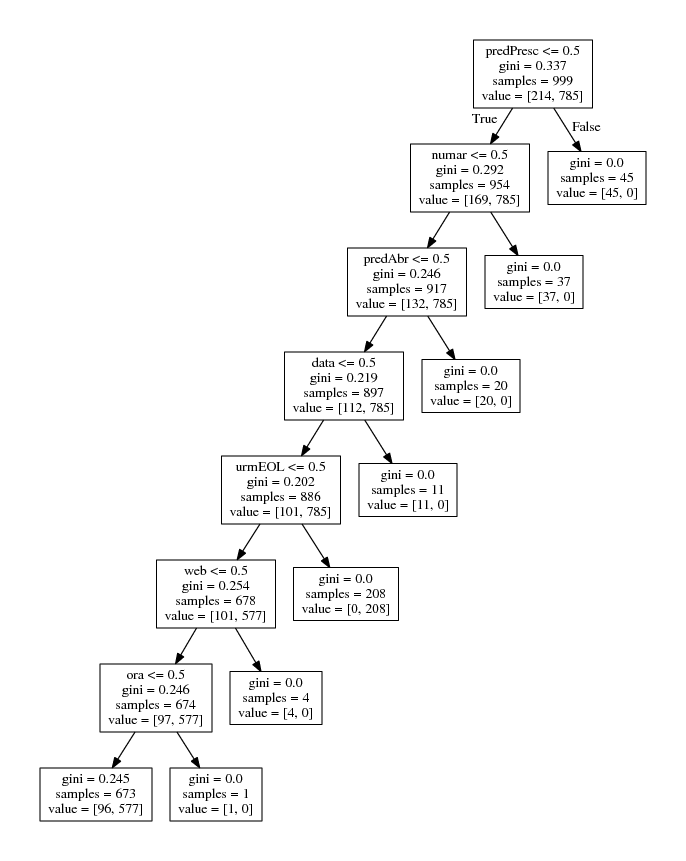

In [175]:
from wand.image import Image as WImage
img = WImage(filename='trainingPuncte01.pdf')
img

In [176]:
# Make predictions using the testing set
y_pred1 = clf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred1))

Mean squared error: 0.04


In [177]:
data_2 = pd.get_dummies(data, columns=data.columns)

In [178]:
data_2

predAbr_no  predAbr_yes  ora_no  ora_yes  data_no  data_yes  numar_no  \
0             1            0       1        0        1         0         1   
1             1            0       1        0        1         0         1   
2             1            0       1        0        1         0         1   
3             1            0       1        0        1         0         1   
4             1            0       1        0        1         0         1   
5             1            0       1        0        1         0         1   
6             1            0       1        0        1         0         1   
7             1            0       1        0        1         0         1   
8             1            0       1        0        1         0         1   
9             1            0       1        0        1         0         1   
10            1            0       1        0        1         0         1   
11            1            0       1        0        1         0         1   
12            1            0       1        0        1         0         1   
13            1            0       1        0        1         0         1   
14            1            0       1        0        1         0         1   
15            1            0       1        0        1         0         1   
16            1            0       1        0        1         0         1   
17            1            0       1        0        1         0         1   
18            1            0       1        0        1         0         1   
19            1            0       1        0        1         0         1   
20            1            0       1        0        1         0         1   
21            1            0       1        0        1         0         1   
22            1            0       1        0        1         0         0   
23            1            0       1        0        1         0         1   
24            1            0       1        0        1         0         1   
25            1            0       1        0        1         0         1   
26            1            0       1        0        1         0         1   
27            1            0       1        0        1         0         1   
28            1            0       1        0        1         0         1   
29            1            0       1        0        1         0         1   
..          ...          ...     ...      ...      ...       ...       ...   
969           1            0       1        0        1         0         1   
970           1            0       1        0        1         0         1   
971           1            0       1        0        1         0         0   
972           1            0       1        0        1         0         0   
973           1            0       1        0        1         0         0   
974           1            0       1        0        1         0         1   
975           1            0       1        0        1         0         1   
976           1            0       1        0        1         0         1   
977           1            0       1        0        1         0         1   
978           1            0       1        0        0         1         1   
979           1            0       1        0        0         1         1   
980           1            0       1        0        0         1         1   
981           1            0       1        0        0         1         1   
982           1            0       1        0        0         1         1   
983           1            0       1        0        1         0         0   
984           1            0       1        0        1         0         0   
985           1            0       1        0        1         0         1   
986           1            0       1        0        1         0         1   
987           1            0       1        0        1         0         1   
988           1            

In [179]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
X = data_2[data_2.columns.drop(['sfarsitDeProp_no', 'sfarsitDeProp_yes'])]
y = data_2['sfarsitDeProp_yes']

In [180]:
X.shape
y.shape
X_train = X
y_train = y
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [181]:
data_2_test = pd.get_dummies(data_test, columns=data_test.columns)

In [182]:
data_2_test

predAbr_no  predAbr_yes  ora_no  ora_yes  data_no  data_yes  numar_no  \
0            1            0       1        0        1         0         0   
1            1            0       1        0        0         1         1   
2            1            0       1        0        0         1         1   
3            1            0       1        0        1         0         1   
4            1            0       0        1        1         0         1   
5            1            0       1        0        1         0         1   
6            1            0       1        0        1         0         1   
7            1            0       1        0        1         0         1   
8            1            0       1        0        1         0         1   
9            1            0       1        0        1         0         1   
10           1            0       1        0        1         0         1   
11           1            0       1        0        1         0         1   
12           1            0       1        0        1         0         1   
13           1            0       1        0        1         0         1   
14           1            0       1        0        0         1         1   
15           1            0       1        0        0         1         1   
16           1            0       0        1        1         0         1   
17           1            0       1        0        1         0         1   
18           0            1       1        0        1         0         1   
19           0            1       1        0        1         0         1   
20           0            1       1        0        1         0         1   
21           0            1       1        0        1         0         1   
22           1            0       1        0        1         0         1   
23           1            0       1        0        1         0         1   

    numar_yes  predPresc_no  predPresc_yes  web_no  web_yes  nume_no  \
0           1             1              0       1        0        1   
1           0             1              0       1        0        1   
2           0             1              0       1        0        1   
3           0             0              1       1        0        1   
4           0             1              0       1        0        1   
5           0             1              0       1        0        1   
6           0             1              0       1        0        1   
7           0             1              0       1        0        1   
8           0             1              0       1        0        1   
9           0             1              0       1        0        1   
10          0             1              0       1        0        1   
11          0             1              0       0        1        1   
12          0             1              0       0        1        1   
13          0             1              0       1        0        1   
14          0             1              0       1        0        1   
15          0             1              0       1        0        1   
16          0             1              0       1        0        1   
17          0             1              0       1        0        1   
18          0             1              0       1        0        1   
19          0             1              0       1        0        1   
20          0             1              0       1        0        1   
21          0             1              0       1        0        1   
22          0             0              1       1        0        1   
23          0             1              0       1        0        1   

    urmEOL_no  urmEOL_yes  sfarsitDeProp_no  sfarsitDeProp_yes  
0           1           0                 1                  0  
1           1           0                 1                  0  
2           1           0                 1                  0  
3           1    

In [183]:
X = data_2_test[data_2_test.columns.drop(['sfarsitDeProp_no', 'sfarsitDeProp_yes'])]
y = data_2_test['sfarsitDeProp_yes']

In [184]:
X.shape
y.shape
X_test = X
y_test = y

In [185]:
clf.fit(X_train,y_train)
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None, feature_names=X_train.columns.get_values(),  
                         filled=True)
graph = graphviz.Source(dot_data)
graph.render("trainingPuncte01_2")

'trainingPuncte01_2.pdf'

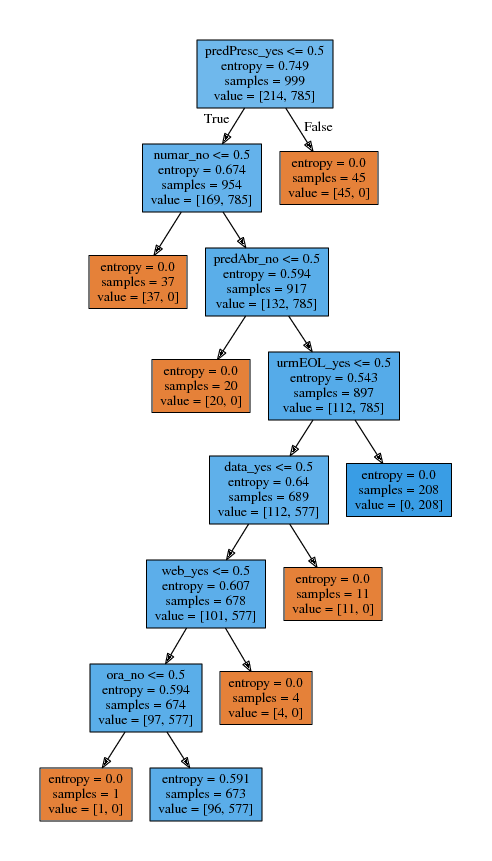

In [186]:
from wand.image import Image as WImage
img = WImage(filename='trainingPuncte01_2.pdf')
img

In [187]:
# Make predictions using the testing set
y_pred2 = clf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred1))

Mean squared error: 0.04
